##Summon any data

I want to make a single query and have it return data across the datasets

,nothing,Year,DOY,CR3000 CF Change [counts],CR3000 Zen Angle [degrees],Global LI-200 [W/m^2],Global CM22 (vent/cor) [W/m^2],Global RG780 PSP (vent/cor) [W/m^2],Global TSP-1 [W/m^2],Global CM6b (cor) [W/m^2],Global SP Lite [W/m^2],Global SP-110 [W/m^2],Global TSP-700 Vent [W/m^2],Research 1,Research 2,Global TUVR [W/m^2],Global 501A [W/m^2],Global 501A [MED/hr],Global MS210W [W/m^2],Global CUVA1 [W/m^2],Global CUVB1 [W/m^2],Global UV-S-A-T [W/m^2],Global UV-S-B-T [W/m^2],Global UVB-1 [W/m^2],Global 501A [Index],Direct NIP #1 [W/m^2],Direct NIP #2 [W/m^2],Direct LI-201 [W/m^2],Direct RG780 NIP [W/m^2],Direct CH1 [W/m^2],Zebra PSP (cor) [W/m^2],Direct CUVA2 [W/m^2],Direct CUVB2 [W/m^2],500nm TWC Photometer [V],Global SPN1 [W/m^2],Diffuse SPN1 [W/m^2],Data lab Dry Bulb Temp [deg C],Data lab RH [%],Diffuse PSP (sband/cor) [W/m^2],Research F1,Diffuse 8-48 (vent) [W/m^2],Diffuse CM22 (vent/cor) [W/m^2],Research F0,Research 3,Downwelling IR PIR Vent [W/m^2],Downwelling IR CG4 Vent [W/m^2],Upwelling IR PIR [W/m^2],Instrument Net DW PIR [W/m^2],Instrument Net DW CG4 [W/m^2],Instrument Net UW PIR [W/m^2],Global PSP (cor) [W/m^2],Global PSP (vent/cor) [W/m^2],Diffuse PSP (vent/cor) [W/m^2],Diffuse CUV4 [W/m^2],Global CUV4 [W/m^2],Avg Wind Speed @ 19ft [m/s],Avg Wind Direction @ 19ft [deg from N],Peak Wind Speed @ 19ft [m/s],Direct MS-56 [W/m^2],Research 4,PIR DW Dome Temp [deg K],PIR DW Case Temp [deg K],CG4 DW Case Temp [deg K],PIR UW Dome Temp [deg K],PIR UW Case Temp [deg K],CR3000 Temp [deg C],Deck Dry Bulb Temp [deg C],Deck RH [%],501A Temp [deg C],CUVA1 Temp [deg C],CUVB1 Temp [deg C],CUVA2 Temp [deg C],CUVB2 Temp [deg C],UVSAT Temp [deg C],UVSBT Temp [deg C],UVB-1 Temp [deg C],Horiz TP Thermal Corr,CR3000 Battery [VDC],CR3000 Pgm Time [s],Direct Quantum LI-190 [umol/s/m^2],Direct TUVR [W/m^2],Global PSP [mV],Global PSP Vent [mV],Global CM22 [mV],Global RG780 PSP [mV],Global CM6b [mV],Zebra PSP [mV],Diffuse PSP (sband) [mV],Diffuse PSP [mV],Diffuse CM22 [mV],Global Quantum LI-190 [umol/s/m^2],Global Photometric LI-210 [klux],Upwelling Shortwave CM3 (CNR1) [W/m^2],Upwelling IR CG3 (CNR1) [W/m^2],Instrument Net UW CG3 [W/m^2],Upwelling Shortwave PSP [W/m^2],Upwelling Shortwave LI-200 [W/m^2],Upwelling Quantum LI-190 [umol/s/m^2],CNR1 Case Temp [deg K],Global CM3 (CNR1) [W/m^2],Downwelling IR CG3 (CNR1) [W/m^2],Instrument Net DW CG3 [W/m^2],Snow Depth [cm],Precipitation [mm],Precipitation (Accumulated) [mm],Station Pressure [mBar],Global 40-South PSP [W/m^2],Global 40-South LI-200 [W/m^2],Global Normal CM-21 [W/m^2],Global 90-North PSP [W/m^2],Global 90-North LI-200 [W/m^2],Global 90-East PSP [W/m^2],Global 90-East LI-200 [W/m^2],Global 90-South PSP [W/m^2],Global 90-South LI-200 [W/m^2],Global 90-West PSP [W/m^2],Global 90-West LI-200 [W/m^2],Research RT0,Research RT1,Research RT2,Atmospheric Electric Field [kV/m],CR10X Temp (Rad-Twr) [deg C],CR10X Battery (Rad-Twr) [VDC],LI-2020 Battery [VDC],Tower Dry Bulb Temp [deg C],Tower RH [%],Avg Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Peak Wind Speed @ 6ft [m/s],CR10X Overuns (Rad-Twr) [counts],Snow Depth Quality,SE Dry Bulb Temp [deg C],SE RH [%],SE-POA Angle [degrees],Global SE-POA LI-200 [W/m^2],CR10X Overuns (Met-Twr) [counts],CR10X Temp (Met-Twr) [deg C],CR10X Battery (Met-Twr) [VDC],Vertical Wind Shear [1/s],Research PVT1,Research PVT2,Avg Wind Speed @ 22ft [m/s],Avg Wind Direction @ 22ft [deg from N],Avg Wind Speed @ 42ft [m/s],Avg Wind Direction @ 42ft [deg from N],Research PVT0,Peak Wind Speed @ 22ft [m/s],Peak Wind Speed @ 42ft [m/s],Delta UT1 [seconds],500nm TWC AOD,Net Radiation Eppley [W/m^2],Net Radiation K&Z [W/m^2],Atmos Net Infrared PIRs [W/m^2],Atmos Net Infrared K&Zs [W/m^2],Albedo (PSP),Albedo (K&Z),Albedo (LI-200),Albedo Quantum (LI-190),Broadband Turbidity,500nm Estimated AOD,Sea-Level Pressure (Est) [mBar],Tower Dew Point Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Wind Chill Temp [deg C],Deck Wind Chill Temp [deg C],Total Cloud Cover [%],Opaque 

,Power
datetime,
2014-04-01 15:00:00,6951.916667


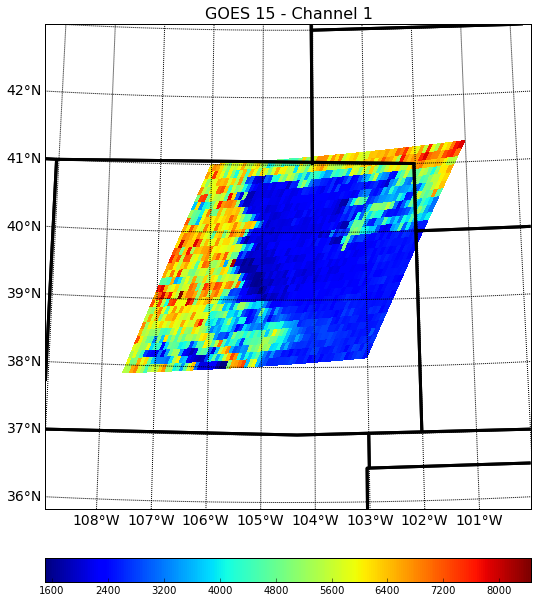

In [16]:
from mpl_toolkits.basemap import Basemap  #map stuff
from datetime import datetime,timedelta, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_helper_functions import *
from IPython.display import display
pd.options.display.max_columns = 999
%matplotlib inline

desired_channel = 'BAND_01'
desired_date = datetime(2014, 4, 1)
desired_timedelta = timedelta(hours = 15)
desired_datetime = desired_date + desired_timedelta
satellite_filefolder = '../../data/satellite/colorado/summer6months/data/'
sensor_filefolder = '../../data/sensor_data/colorado6months/'
pvoutput_filefolder = '../../data/pvoutput/pvoutput6months/'

#satellite data
satellite_filename = find_filename(desired_datetime, desired_channel, satellite_filefolder)
lons, lats, data = return_satellite_data(satellite_filename, satellite_filefolder)


# plt.figure(figsize=(8, 8))
# imgplot = plt.imshow(data)
# imgplot.set_interpolation('none')
# plt.savefig('foo.png')
# plt.show()

#sensor data
sensor_filename = find_file_from_date(desired_date, sensor_filefolder)
df_sensor = return_sensor_data(sensor_filename, sensor_filefolder)
df_sensor[df_sensor.index == desired_datetime]
display(df_sensor[df_sensor.index == desired_datetime])

#pvoutput data
pvoutput_filename = find_file_from_date(desired_date, pvoutput_filefolder)
df_pvoutput = return_pvoutput_data(pvoutput_filename, pvoutput_filefolder)
display(df_pvoutput[df_pvoutput.index == desired_datetime])




# Get some parameters for the Stereographic Projection
m = Basemap(width=800000,height=800000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=39.5,lon_0=-104.5)

xi, yi = m(lons, lats) #map onton x and y for plotting
plt.figure(figsize=(10,10)) # Plot Data
cs = m.pcolor(xi,yi,np.squeeze(data)) #data is 1 x 14 x 36, squeeze makes it 14 x 36

m.drawparallels(np.arange(-80., 81., 1.), labels=[1,0,0,0], fontsize=14) # Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=14) # Add Grid Lines
m.drawstates(linewidth=3) # Add state boundaries

cbar = m.colorbar(cs, location='bottom', pad="10%") # Add Colorbar
plt.title('GOES 15 - Channel 1', fontsize=16) # Add Title
plt.legend(prop={'size':32})
plt.show()

##Build up sensor to pvoutput model

In [29]:
from datetime import datetime,timedelta, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_helper_functions import *
from IPython.display import display
pd.options.display.max_columns = 999
%matplotlib inline

#iterate over datetimes:
mytime = datetime(2014, 4, 1, 13)
times = make_time(mytime)

# Now that we can call data up over any datetime and we have a list of interested datetimes,
# we can finally construct an X matrix and y vector for regression.

sensor_filefolder = 'data/sensor_data/colorado6months/'
pvoutput_filefolder = 'data/pvoutput/pvoutput6months/'

X = [] #Sensor values
y = [] #PVOutput

for desired_datetime in times:
    
    try: #something wrong with y on last day
        desired_date = (desired_datetime - timedelta(hours=6)).date() #make sure correct date
        desired_date = datetime.combine(desired_date, time.min) #get into datetime format

        sensor_filename = find_file_from_date(desired_date, sensor_filefolder)
        df_sensor = return_sensor_data(sensor_filename, sensor_filefolder).ix[:,-15:-1]
        df_sensor[df_sensor.index == desired_datetime]

        pvoutput_filename = find_file_from_date(desired_date, pvoutput_filefolder)
        df_pvoutput = return_pvoutput_data(pvoutput_filename, pvoutput_filefolder)
        
        y.append(df_pvoutput[df_pvoutput.index == desired_datetime].values[0][0])
        X.append(df_sensor[df_sensor.index == desired_datetime].values[0])
    except:
        pass

In [30]:
X = np.array(X)
y = np.array(y)

In [31]:
print X.shape
print y.shape

(2729, 14)
(2729,)


...finally ready to model!

###Random Forest

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(oob_score = True)

In [34]:
rfr.fit(X_train,y_train)

/Users/scott/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:659: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [35]:
y_pred = rfr.predict(X_test)

In [36]:
rfr.score(X_test,y_test)

0.7490756392067901

In [37]:
df_sensor.columns.values.shape

(14,)

In [38]:
sorted_mask = np.argsort(rfr.feature_importances_)

for i in zip(df_sensor.columns.values,rfr.feature_importances_[sorted_mask])[::-1]:
    print i

('1020nm Obsolete AOD', 0.29705980474717808)
('940nm Obsolete AOD', 0.17174617509650866)
('870nm Obsolete AOD', 0.17083940295469266)
('675nm Obsolete AOD', 0.071429494096470258)
('500nm Obsolete AOD', 0.045184771111814695)
('400nm Obsolete AOD', 0.036439937457282537)
('315nm Obsolete AOD', 0.03505373030081841)
('1020nm POM-01 Photometer [uA]', 0.031564635340118663)
('940nm POM-01 Photometer [uA]', 0.031207228143303643)
('870nm POM-01 Photometer [uA]', 0.025846240358196205)
('675nm POM-01 Photometer [uA]', 0.024115547890639334)
('500nm POM-01 Photometer [uA]', 0.023503414572774273)
('400nm POM-01 Photometer [uA]', 0.020845598241361792)
('315nm POM-01 Photometer [nA]', 0.015164019688840746)


###Linear model

In [39]:
#now do a linear model and compare:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

-48.833843056591832

In [40]:
sorted_mask = np.argsort(lr.coef_)

for i in zip(df_sensor.columns.values,lr.coef_[sorted_mask])[::-1]:
    print i

('1020nm Obsolete AOD', 25720.514248532258)
('940nm Obsolete AOD', 5787.6495593808249)
('870nm Obsolete AOD', 924.66656776148329)
('675nm Obsolete AOD', 266.2149419573488)
('500nm Obsolete AOD', 254.70915555929054)
('400nm Obsolete AOD', 0.18497028763408108)
('315nm Obsolete AOD', -12.098032718226079)
('1020nm POM-01 Photometer [uA]', -78.41950447932544)
('940nm POM-01 Photometer [uA]', -170.39792476852338)
('870nm POM-01 Photometer [uA]', -260.19451251012526)
('675nm POM-01 Photometer [uA]', -2952.8050029904844)
('500nm POM-01 Photometer [uA]', -3374.2232859668857)
('400nm POM-01 Photometer [uA]', -6081.5228897332427)
('315nm POM-01 Photometer [nA]', -20024.56399336789)


In [41]:
df_sensor.ix[:,-15:-1].head() #selects photometer and AOD, 
# useful in next iteration of using sensor data to fit

,315nm POM-01 Photometer [nA],400nm POM-01 Photometer [uA],500nm POM-01 Photometer [uA],675nm POM-01 Photometer [uA],870nm POM-01 Photometer [uA],940nm POM-01 Photometer [uA],1020nm POM-01 Photometer [uA],315nm Obsolete AOD,400nm Obsolete AOD,500nm Obsolete AOD,675nm Obsolete AOD,870nm Obsolete AOD,940nm Obsolete AOD
datetime,,,,,,,,,,,,,
2014-09-29 07:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-09-29 08:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-09-29 09:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-09-29 10:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-09-29 11:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0


When only keeping the photometer data, random forest and linear model do pretty similar.  When I added all of the sensor instruments to the fit, rfr scored 0.87 and lr scored negative!

Also, I threw away the mysterious "Research 2" sensor, that was probably just a solar panel!  I asked NREL what it is, so we'll see.  If it turns out to be a solar panel, then I can do some feature engineering with the sensor data by simulating a solar panel!

###Neural Net Exploration

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from lasagne import layers
from lasagne.nonlinearities import  softmax, rectify, sigmoid, linear, very_leaky_rectify, tanh
from lasagne.updates import nesterov_momentum, adagrad, momentum
from nolearn.lasagne import NeuralNet
import theano
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
y = y.astype('float32')
x = X.astype('float32')
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 12)

In [44]:
nn_regression = NeuralNet(layers=[('input', layers.InputLayer),
#                                   ('hidden1', layers.DenseLayer),
#                                    ('hidden2', layers.DenseLayer),
                                  ('output', layers.DenseLayer)
                                ],

               # Input Layer
               input_shape=(None, x.shape[1]),

               # hidden Layer
#                hidden1_num_units=512,
#                hidden1_nonlinearity=softmax,
                          
             # hidden Layer
#                hidden2_num_units=128,
#                hidden2_nonlinearity=linear,

              # Output Layer
              output_num_units=1,
              output_nonlinearity=very_leaky_rectify,

              # Optimization
              update=nesterov_momentum,
              update_learning_rate=0.03,#0.02
              update_momentum=0.8,#0.8
              max_epochs=600, #was 100

              # Others
              #eval_size=0.2,
              regression=True,
              verbose=0,
         )

In [45]:
nn_regression.fit(x_train, y_train)
y_pred = nn_regression.predict(x_test)
nn_regression.score(x_test, y_test)

14222684.509928443

In [46]:
val = 11
print y_pred[val][0]
print y_test[val]

4136.2008404
2604.83


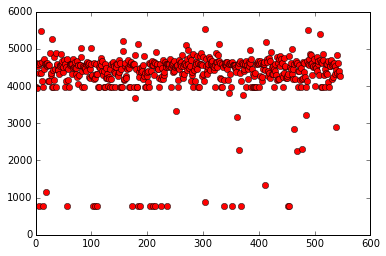

In [47]:
plt.plot(y_pred,'ro')

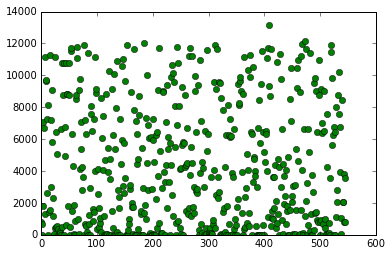

In [48]:
plt.plot(y_test,'go')

##Extra Trees!

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(oob_score=True, bootstrap=True,
                          n_jobs=-1, n_estimators=1000) #nj_obs uses all cores!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [50]:
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=1000, n_jobs=-1, oob_score=True, random_state=None,
          verbose=0, warm_start=False)

In [51]:
print etr.score(X_test,y_test)
print etr.oob_score_

0.790968287117
0.764343725942


In [52]:
y_pred = etr.predict(X_test)

from random import randint
val = randint(0,y_test.shape[0])
print y_pred[val]
print y_test[val]

3977.51362318
4341.58


In [53]:
print X.shape
print y.shape

(2729, 14)
(2729,)


Save this thing and try it out on the simulated sensors!

In [91]:
from sklearn.externals import joblib
joblib.dump(etr, 'data/sensor-to-power-model/sensor-to-power-model.pkl') 

['data/sensor-to-power-model/sensor-to-power-model.pkl',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_01.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_02.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_03.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_04.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_05.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_06.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_07.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_08.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_09.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_10.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_11.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_12.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_13.npy',
 'data/sensor-to-power-model/sensor-to-power-model.pkl_14.npy',
 'data/sensor-to-power-model/sensor-to-power-mo

In [92]:
np.savez_compressed('data/y.npz',y=y) #save y